# Capstone Project: Water Turbidity Prediction through Machine Learning

Datasets:
* New York Watershed Quality Data from [Kaggle](https://www.kaggle.com/new-york-city/ny-watershed-water-quality-data)
* New York Weather Data from [NOAA](https://www.noaa.gov/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

**Water Quality Dataset**

In [68]:
df = pd.read_csv('watershed-water-quality-data.csv')

In [5]:
print(df.shape)
print('Sites Observed: ', str(df['Site'].unique().tolist()))
df.head()

(1548, 10)
Sites Observed:  ['DEL18DT']


,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-03-31T00:00:00.000,0.75,0.7,0.80,0.65,0.70,0.70,0.72,<1
1,DEL18DT,2019-03-30T00:00:00.000,0.70,0.8,0.75,0.75,0.75,0.75,0.75,<1
2,DEL18DT,2019-03-29T00:00:00.000,0.80,0.8,0.80,0.75,0.80,0.80,0.79,E1
3,DEL18DT,2019-03-28T00:00:00.000,0.75,0.8,0.75,0.80,0.75,0.80,0.78,<1
4,DEL18DT,2019-03-27T00:00:00.000,0.85,0.8,0.80,0.75,0.85,0.80,0.81,<1


There are 1548 rows and a single site. The turbidity is measured six times a day. There is already a column for the average turbidity per day.

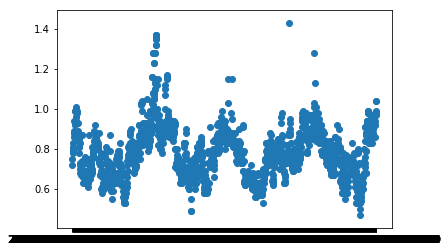

In [14]:
fig = plt.scatter(df['Date'], df['Average 24hrTurbidity(NTU)'])

**Weather Dataset**

In [71]:
df2 = pd.read_csv('nyweather.csv')

In [72]:
print(df2.shape)
df2.head()

(1492, 44)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-01,5.14,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-02,2.91,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,W"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-03,2.46,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-04,5.37,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-05,4.03,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the weather data on a single station located in NY City Central. Removing the unnecessary columns:

In [73]:
df2 = df2.dropna(axis=1, how="any")
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-01,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",63,",,W",49,",,W"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-02,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",74,",,W",48,",,W"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-03,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",80,",,W",51,",,W"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-04,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",85,",,W",57,",,W"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-05,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",85,",,W",66,",,W"


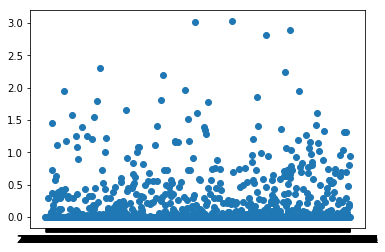

In [17]:
fig = plt.scatter(df2['DATE'], df2['PRCP'])

**Merging the datasets, TRIAL**

The weather dataset is in chronological order while the water quality dataset is in reverse. 

In [69]:
df['Date']=df['Date'].str[0:10]
df = df.sort_values(by='Date',ascending=True)
df.head()

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
1547,DEL18DT,2015-05-10,NaN,1.0,0.95,0.95,1.00,1.00,0.98,<1
1546,DEL18DT,2015-05-11,1.0,1.1,0.95,1.00,1.10,1.10,1.04,<1
1545,DEL18DT,2015-05-12,1.1,1.1,1.10,0.90,0.95,1.10,1.04,1
1544,DEL18DT,2015-05-13,0.9,1.1,0.95,0.90,1.00,0.95,0.97,1
1543,DEL18DT,2015-05-14,1.1,1.0,1.00,0.95,0.95,0.95,0.99,<1


In [74]:
df2 = df2.rename({'DATE': 'Date'}, axis=1)
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,Date,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-01,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",63,",,W",49,",,W"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-02,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",74,",,W",48,",,W"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-03,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",80,",,W",51,",,W"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-04,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",85,",,W",57,",,W"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-05-05,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",85,",,W",66,",,W"


In [76]:
df3 = pd.merge(df,df2, on='Date')
df3.head()

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)",...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,DEL18DT,2015-05-10,NaN,1.0,0.95,0.95,1.00,1.00,0.98,<1,...,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",83,",,W",61,",,W"
1,DEL18DT,2015-05-11,1.0,1.1,0.95,1.00,1.10,1.10,1.04,<1,...,0.0,"T,,W,2400",0.0,",,W,",0.0,",,W,",84,",,W",70,",,W"
2,DEL18DT,2015-05-12,1.1,1.1,1.10,0.90,0.95,1.10,1.04,1,...,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",86,",,W",64,",,W"
3,DEL18DT,2015-05-13,0.9,1.1,0.95,0.90,1.00,0.95,0.97,1,...,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",70,",,W",53,",,W"
4,DEL18DT,2015-05-14,1.1,1.0,1.00,0.95,0.95,0.95,0.99,<1,...,0.0,",,W,2400",0.0,",,W,",0.0,",,W,",73,",,W",50,",,W"


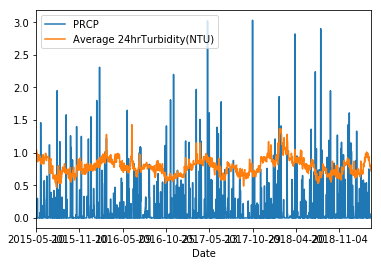

In [82]:
df3.plot(x='Date', y=['PRCP', 'Average 24hrTurbidity(NTU)'])

The graph shows a correlation on the two variables.

**Next Steps:**
* Normalize the data
* Figure out if variables should be aligned on exact dates or if one should be delayed